In [4]:
# -*- coding: utf-8 -*-
"""
@author: domist07
"""
# Load packages
import sys
import gempy as gp
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from gempy.plot import visualization_2d_pro as vv
from gempy.plot import vista
# import pyvista as pv
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\gempy\\plot\\vista.py'>

In [5]:
# %% read data
path_sp = "322_Influence-surface-thickness_Points.csv"
df_sp = pd.read_csv(path_sp)

geo_data = gp.create_model('Issue322')
geo_data.set_surface_points(df_sp, add_basement=True)
geo_data.surface_points.df['smooth'] = 0

path_ori = "322_Influence-surface-thickness_Orientations.csv"
df_ori = pd.read_csv(path_ori)
df_ori = df_ori.iloc[:,[0,1,2,9,10,11,12]]
geo_data.set_orientations(df_ori)

In [6]:
# %% Set surfaces
gp.map_series_to_surfaces(geo_data, {"Verw1": ('Verw1'), "Verw2": ('Verw2'),
                                     "Auffuel": ('Quartaer'),
                                     "Sand": ('verwKeuper', 'Sandstein'),
                                     "Schluff": ('Schluffstein')},
                          sort_geometric_data=True,
                          remove_unused_series=True)

geo_data.set_is_fault(['Verw1', 'Verw2'], change_color=False)
geo_data.series.set_bottom_relation("Auffuel", 'Onlap')
geo_data.faults.faults_relations_df.Auffuel = False
geo_data.faults.faults_relations_df.Sand = False

Min = np.array([np.min(geo_data.surface_points.df['X']),
                np.min(geo_data.surface_points.df['Y']),
                np.min(geo_data.surface_points.df['Z'])])
Max = np.array([np.max(geo_data.surface_points.df['X']),
                np.max(geo_data.surface_points.df['Y']),
                np.max(geo_data.surface_points.df['Z'])])

geo_data.grid.create_regular_grid([Min[0]-20, Max[0]+20,
                                   Min[1]-20, Max[1]+20,
                                   Min[2]-20, Max[2]+20],
                                  [50, 50, 50])

In [7]:
# %% Set sections
section_dict = {'LS1': ([595, 274],
                        [610, 552],
                        [200, 200]),}
geo_data.grid.create_section_grid(section_dict)

,start,stop,resolution,dist
LS1,"[595, 274]","[610, 552]","[200, 200]",278.404382


In [8]:
# %% Interpolation
gp.set_interpolator(geo_data, compile_theano=True, theano_optimizer='fast_run', verbose=[])
# geo_data.modify_kriging_parameters('range', 100)
# geo_data.modify_kriging_parameters('$C_o$', 100)

gp.compute_model(geo_data, sort_surfaces=False, compute_mesh=True)

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


C:\ProgramData\Anaconda3\lib\site-packages\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')



Lithology ids 
  [7. 7. 7. ... 3. 3. 3.] 

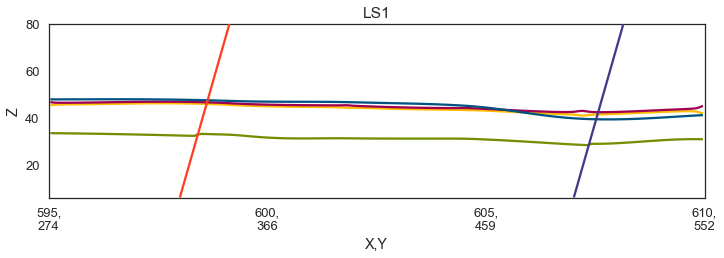

<Figure size 748.8x514.8 with 0 Axes>

In [9]:
# %% plot contacts
for i in geo_data.grid.sections.names:
    p = gp._plot.plot_2d(geo_data)
    sec_name = i
    a = p.add_section(sec_name)
    # p.plot_lith(a, sec_name)
    p.plot_contacts(a, sec_name, a=0.5)
    p.create_figure()
del i, sec_name, a

In [10]:
# plot 3D
gv = vista.Vista(geo_data, plotter_type='background', notebook=False,
                  real_time=True)
gv.plot_surfaces()
# gv.plot_surface_points()
# gv.plot_topography()
# gv.plot_orientations()

,val
4,PolyData (0x1fe7e74adc8)\n N Cells:\t5624\n ...
5,PolyData (0x1fe7e74aee8)\n N Cells:\t5634\n ...
0,PolyData (0x1fe7e74ae28)\n N Cells:\t6612\n ...
1,PolyData (0x1fe7e74aca8)\n N Cells:\t7078\n ...
2,PolyData (0x1fe7e74a3a8)\n N Cells:\t7026\n ...
3,PolyData (0x1fe7e508408)\n N Cells:\t6526\n ...
